<a href="https://colab.research.google.com/github/ShubhamSaini01/Kaggle/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiDeM5nHhqOEuqJlDJSGWiQYANzMP3zBgwvZ6efEDsc0K8bR1vmxls
Mounted at /content/drive


In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "gaurangpendharkar" # username from the json file
os.environ['KAGGLE_KEY'] = "da6c2facfd02e351199bfc52b9a22f32" # key from the json file

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

In [ ]:
!kaggle competitions download -c digit-recognizer -p /content/drive/MyDrive/Kaggle/Digits

 59% 9.00M/15.3M [00:00<00:00, 77.4MB/s]
100% 15.3M/15.3M [00:00<00:00, 98.3MB/s]


In [ ]:
!unzip /content/drive/MyDrive/Kaggle/Digits/digit-recognizer.zip -d /content/drive/MyDrive/Kaggle/Digits

Archive:  /content/drive/MyDrive/Kaggle/Digits/digit-recognizer.zip
  inflating: /content/drive/MyDrive/Kaggle/Digits/sample_submission.csv  
  inflating: /content/drive/MyDrive/Kaggle/Digits/test.csv  
  inflating: /content/drive/MyDrive/Kaggle/Digits/train.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Kaggle/Digits/train.csv')

In [4]:
display(dataset)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print(X_train.shape)
print(y_train.shape)

(33600, 784)
(33600,)


In [9]:
X_train = np.reshape(X_train, (33600,28,28,1))

In [10]:
y_train = tf.reshape(y_train, [33600,1]).numpy()

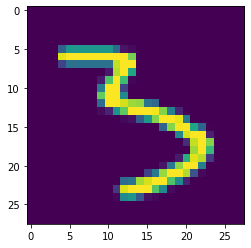

In [ ]:
plt.imshow(X_train[23], interpolation='nearest')
plt.show()

In [11]:
y_train.shape

(33600, 1)

In [12]:
X_test = np.reshape(X_test, (-1,28,28,1))
X_test.shape

(8400, 28, 28, 1)

In [ ]:
display(X_train[0])

##Models

###Convolutional Neural Network


In [14]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
cnn.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size=32, epochs = 20)

Epoch 1/20
840/840 [==============================] - 16s 19ms/step - loss: 0.2550 - sparse_categorical_accuracy: 0.9251 - val_loss: 0.1158 - val_sparse_categorical_accuracy: 0.9653
Epoch 2/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9748 - val_loss: 0.0857 - val_sparse_categorical_accuracy: 0.9749
Epoch 3/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0660 - val_sparse_categorical_accuracy: 0.9783
Epoch 4/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0391 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.0697 - val_sparse_categorical_accuracy: 0.9784
Epoch 5/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0268 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0554 - val_sparse_categorical_accuracy: 0.9833
Epoch 6/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0200 - spars

In [30]:
y_pred = cnn.predict(X_test)

In [31]:
print(y_pred.shape) #Y is two dimensions because the second dimension represents the probability of it being each number i think
display(y_pred)

(8400, 10)


array([[2.4824092e-22, 1.0227627e-21, 1.1844851e-14, ..., 1.7648808e-18,
        8.2564711e-13, 1.0000000e+00],
       [1.5945579e-19, 5.1827034e-26, 2.3081993e-15, ..., 5.2516368e-13,
        1.0621788e-14, 1.0000000e+00],
       [6.6442632e-21, 3.7740212e-21, 3.1080818e-24, ..., 1.0796394e-20,
        1.6523714e-17, 4.0576442e-11],
       ...,
       [2.2151522e-25, 2.6933750e-15, 3.9828230e-18, ..., 6.7259106e-12,
        3.1050858e-15, 9.0988801e-14],
       [8.3272625e-12, 2.7566773e-12, 2.5888720e-13, ..., 9.9999976e-01,
        4.0941009e-12, 2.4131751e-07],
       [2.6255016e-12, 1.4002751e-07, 4.2462412e-05, ..., 6.7171859e-09,
        9.9995744e-01, 2.8118876e-09]], dtype=float32)

In [41]:
y_prediction = np.zeros((8400)) #We are going through every row and finding which number has the greatest probability
for row in range(len(y_pred[:,0])):
  max =y_pred[row,0]
  value = 0
  for p in range(1,10):
    if y_pred[row,p]>max:
      max = y_pred[row,p]
      value = p
  y_prediction[row] = value
    

In [44]:
y_prediction = y_prediction.astype(int)

In [45]:
y_test.shape

(8400,)

In [47]:
print(np.concatenate((y_prediction.reshape(len(y_prediction,),1), y_test.reshape(len(y_test),1)),1))

[[9 9]
 [9 9]
 [5 5]
 ...
 [4 4]
 [7 7]
 [8 8]]


In [52]:
correct = 0
for x,y in zip(y_prediction,y_test):
  if x==y:
    correct +=1
percentage = correct/len(y_test)*100
print("Accuracy:" + str(percentage))

Accuracy:98.38095238095238


In [56]:
cnn.save('Digits_CNN')

INFO:tensorflow:Assets written to: Digits_CNN/assets


In [64]:
%cd /content/

/content


OSError: ignored

###SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
#Creating an instance of SVM with kernel type rbf and random_state for instruction purposes
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
#Parameters (Number of neighbors, the metric technique (Euclidean distance), p = 2 also means Euclidean dist)
#In summary, classifier will choose 5 nearest neighbors and compute the closest ones using Euclidean dist
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

###ANN

In [ ]:
y_train = y_train.reshape(42000)

In [ ]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
ann = tf.keras.models.Sequential() #Calling the Sequential class

In [ ]:
ann.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) #This creates the first hidden layer (and input layer) with 6 neurons and the rectifier activation function

In [ ]:
ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu')) #Second hidden layer will be the same

In [ ]:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'softmax')) #Output layer will have 10 neuron and a sigmoid activation function

In [ ]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy']) #Optimizer performs Stochastic Gradient Descent(adam)
#Loss determines the cost function used 
#metrics is the metrics considered during the ann training

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100) #The batch_size is the number of observations batched together for stochastic gradient descent
#An epoch is when the NN goes through the training set once

Epoch 1/100
1313/1313 [==============================] - 4s 2ms/step - loss: 2.0219 - sparse_categorical_accuracy: 0.4166
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.2258 - sparse_categorical_accuracy: 0.5627
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.7990 - sparse_categorical_accuracy: 0.7395
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5509 - sparse_categorical_accuracy: 0.8373
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3998 - sparse_categorical_accuracy: 0.8918
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2829 - sparse_categorical_accuracy: 0.9291
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2099 - sparse_categorical_accuracy: 0.9485
Epoch 8/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1651 - sparse_categorical_accuracy: 0.9580
Epoch 9/100
1313/1313 [=

##Testing

In [ ]:
testing_dataset = pd.read_csv('/content/drive/MyDrive/Kaggle/Digits/test.csv')

In [ ]:
display(testing_dataset)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = testing_dataset.iloc[:,:].values

In [ ]:
X_test.shape

(28000, 784)